# Introducción
La implementación de redes neuronales en un dataset ampliamente conocido como el conjunto de datos Wisconsin de cáncer (Wisconsin Breast Cancer) es una tarea fundamental en el campo del aprendizaje automático y la detección de enfermedades. Este conjunto de datos contiene información clínica y características de núcleos celulares de biopsias de tejidos mamarios, y su objetivo es clasificar los tumores en benignos o malignos. 

En este trabajo de documentación, se abordará la elaboración de redes neuronales aplicadas a este dataset, centrándonos en la selección de únicamente dos variables predictoras. La razón detrás de esta elección es mostrar cómo, a veces, un modelo de aprendizaje automático puede ser simplificado y enfocado en un conjunto reducido de características, sin comprometer significativamente su capacidad predictiva. Para ello, se ha utilizado como criterio la selección de las dos variables con una mayor correlación con respecto a la clase de tumores.

A lo largo de esta documentación, los lectores aprenderán cómo implementar una red neuronal, realizar un preprocesamiento de datos adecuado para trabajar con el dataset, seleccionar variables relevantes, llevar a cabo la división del conjunto de datos en entrenamiento y prueba, y entrenar el modelo de redes neuronales. Además, se explorarán las técnicas de evaluación de rendimiento del modelo y se demostrará cómo interpretar los resultados.

El objetivo final de esta documentación es proporcionar una guía práctica y didáctica para aquellos que deseen comprender y aplicar redes neuronales en el contexto de la detección de cáncer utilizando un conjunto de datos ampliamente reconocido. Al focalizarnos en la selección de dos variables, demostramos cómo incluso en situaciones de dimensiones reducidas, el aprendizaje automático puede ofrecer soluciones valiosas y confiables.

# Librerias necesarias

La línea de código "import pandas as pd" en Python importa la biblioteca "pandas" y la asigna al alias "pd". Pandas es una biblioteca utilizada para la manipulación y análisis de datos. Al asignarle el alias "pd", simplifica la referencia a funciones y objetos de pandas en el código, haciendo que sea más breve y legible.

In [1]:
import pandas as pd


La línea "pwd" en un sistema Unix o Linux muestra la ubicación actual (directorio de trabajo actual) en la que te encuentras en la estructura de directorios del sistema.

In [2]:
pwd

'/home/jovyan'


Esta línea de código define una variable llamada "data" y le asigna la ruta del archivo "/home/jovyan/Machine Learning/wisconsin.csv" como su valor.

In [3]:
data = "/home/jovyan/Machine Learning/wisconsin.csv"


Esta línea de código utiliza la biblioteca pandas ("pd") para cargar los datos de un archivo CSV (ubicado en la ruta almacenada en "data") en un DataFrame de pandas llamado "df".

In [4]:
df = pd.read_csv(data)


df.head() muestra las primeras filas del DataFrame "df" en Python.

In [5]:
df.head()

,patientId,clumpThickness,cellSize,CellShape,marginalAdhesion,epithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,label
0,1,5,1,1,1,2,1.0,3,1,1,benign
1,2,5,4,4,5,7,10.0,3,2,1,benign
2,3,3,1,1,1,2,2.0,3,1,1,benign
3,4,6,8,8,1,3,4.0,3,7,1,benign
4,5,4,1,1,3,2,1.0,3,1,1,benign


Esta línea de código describe estadísticas resumidas de la columna "label" en un DataFrame llamado "df".

In [7]:
df.label.describe()

count        699
unique         2
top       benign
freq         458
Name: label, dtype: object

La línea de código `df['label'] = df['label'].apply(lambda x: 1 if 'benign' in x else 0)` asigna a cada elemento de la columna `label` del DataFrame `df` un valor de 1 si la etiqueta contiene la palabra "benign" y un valor de 0 en caso contrario.

La función `apply()` se utiliza para aplicar una función a cada elemento de un objeto iterable. En este caso, la función que se aplica es una función anónima, también conocida como lambda. La lambda función toma un argumento, `x`, que es el valor actual del elemento.

La lambda función devuelve 1 si la cadena `x` contiene la palabra "benign" y 0 en caso contrario.

In [57]:
df['label'] = df['label'].apply(lambda x: 1 if 'benign' in x else 0)

Accede a la columna "label" de un DataFrame llamado "df".

In [58]:
df.label

0      1
1      1
2      1
3      1
4      1
      ..
694    1
695    1
696    0
697    1
698    1
Name: label, Length: 699, dtype: int64

Esta línea calcula estadísticas descriptivas para un DataFrame en pandas.

In [59]:
df.describe()

,patientId,clumpThickness,cellSize,CellShape,marginalAdhesion,epithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,label
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,667.000000,699.000000,699.000000,699.000000,699.000000
mean,350.000000,4.417740,3.134478,3.207439,2.806867,3.216023,3.536732,3.437768,2.866953,1.589413,0.655222
std,201.928205,2.815741,3.051459,2.971913,2.855379,2.214300,3.683795,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,175.500000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,350.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,524.500000,6.000000,5.000000,5.000000,4.000000,4.000000,7.000000,5.000000,4.000000,1.000000,1.000000
max,699.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000



Esta línea elimina todas las filas que contienen valores nulos en un DataFrame llamado "df" en pandas.

In [60]:
df = df.dropna()



Esta línea elimina las filas que contienen valores nulos en todas sus columnas en un DataFrame en pandas.

In [61]:
df = df.dropna(how='all')

# Justificación de elección de variables

En esta sección concluyo el tomar las variables con una correlación alta positiva ya que requiero clasificar y por ello tomo las variables **CellShape** y **cellsize** por lo que para obtener esa información ejecute las siguentes líneas:

1. Importa las bibliotecas `seaborn` (comúnmente usada para visualización de datos) y `matplotlib.pyplot` (para crear gráficos).

2. Calcula la matriz de correlación entre las variables en el DataFrame `df`. La matriz de correlación mide la relación entre todas las pares de variables en el DataFrame.

3. Configura el tamaño de la figura para la visualización del gráfico de la matriz de correlación, en este caso, se establece un tamaño de 10x8 pulgadas.

4. Ajusta el tamaño de la fuente en el gráfico generado a 1.2.

5. Crea un mapa de calor (heatmap) de la matriz de correlación utilizando `seaborn`. El heatmap representa la fuerza y dirección de la correlación entre las variables. Los parámetros utilizados son:
   - `correlation_matrix`: La matriz de correlación previamente calculada.
   - `annot=True`: Muestra los valores de correlación en cada celda del heatmap.
   - `cmap='coolwarm'`: Define el esquema de colores utilizado para representar la correlación.
   - `fmt=".2f"`: Formato de los valores numéricos (dos decimales).
   - `linewidths=0.5`: Ancho de las líneas que separan las celdas del heatmap.

6. Establece el título del gráfico como "Matriz de correlación".

7. Muestra el gráfico de la matriz de correlación en la pantalla utilizando `plt.show()`.

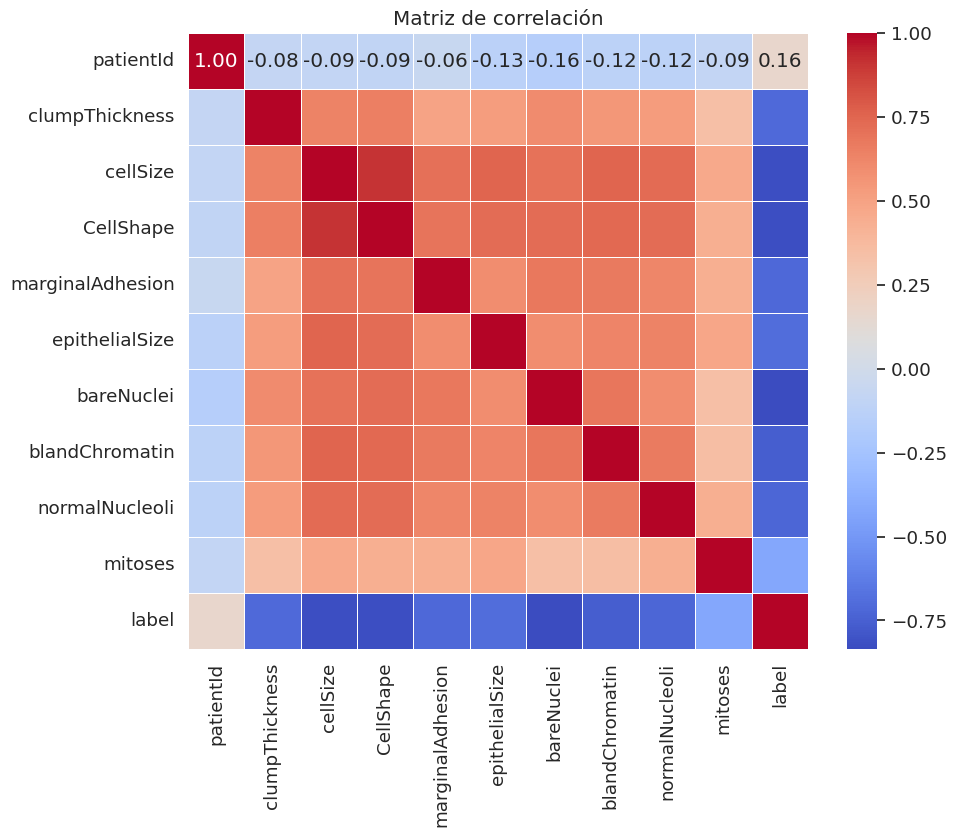

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Configura el estilo de la matriz de correlación
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.set(font_scale=1.2)      # Tamaño de la fuente
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()


# Importando librerias para construcción de perceptron

La línea de código `from keras.models import Sequential` importa la clase `Sequential` del módulo `keras.models`. La clase `Sequential` se utiliza para crear modelos de aprendizaje automático secuenciales.

La línea de código `from keras.layers import Dense` importa la clase `Dense` del módulo `keras.layers`. La clase `Dense` se utiliza para crear capas densas en los modelos de aprendizaje automático secuenciales.

La línea de código `import matplotlib.pyplot as plt` importa la biblioteca `matplotlib.pyplot` a Python. `matplotlib.pyplot` es una biblioteca de Python que proporciona funciones para crear gráficos.

In [74]:
from keras.models import Sequential
from keras.layers import Dense, Activation  # Para capas densas (fully connected) y funciones de activación
import matplotlib.pyplot as plt

En estas líneas de código se están realizando las siguientes acciones en el contexto de un análisis de datos o modelado de machine learning:

1. Se calcula el número de filas que corresponde al 70% del DataFrame original (`df`) y se almacena en la variable `filas_70_porcentaje`. Esto se hace multiplicando el número total de filas del DataFrame por el porcentaje deseado (0.7) y convirtiendo el resultado en un número entero.

2. Se crea un nuevo DataFrame llamado `df_muestra` que toma el 70% de las filas del DataFrame original de manera aleatoria utilizando el método `sample`. El argumento `n` se establece en `filas_70_porcentaje` para seleccionar la cantidad correspondiente de filas y `random_state=42` se utiliza para que la selección sea reproducible.

3. Se crea un nuevo DataFrame llamado `df_restante` que contiene las filas que no se incluyeron en la muestra (`df_muestra`). Esto se hace eliminando del DataFrame original las filas que están presentes en `df_muestra` utilizando el método `drop`.

4. Se crea un conjunto de datos de entrenamiento (`training_data`) que consiste en las columnas 'cellSize' y 'CellShape' del DataFrame `df_muestra`. Estas son las características que se utilizarán para entrenar un modelo de machine learning.

5. Se crea un conjunto de datos de etiquetas de entrenamiento (`target_data`) que consiste en la columna 'label' del DataFrame `df_muestra`. Estas etiquetas se utilizan para entrenar el modelo y representan la variable que se desea predecir.

6. Se crea un conjunto de datos de etiquetas de prueba (`target_data_test`) que consiste en la columna 'label' del DataFrame `df_restante`. Estas etiquetas se utilizan para evaluar el modelo después de entrenarlo.

7. Se crea un conjunto de datos de entrada para el modelo (`input_of_model`) que consiste en las características 'cellSize' y 'CellShape' del DataFrame `df_restante`. Estos datos se utilizarán para hacer predicciones con el modelo una vez que esté entrenado.

In [67]:
# Calcula el número de filas que corresponde al 70% del DataFrame
porcentaje = 0.7
filas_70_porcentaje = int(len(df) * porcentaje)

# Toma el 70% de los valores aleatoriamente
df_muestra = df.sample(n=filas_70_porcentaje, random_state=42)

# Elimina las filas seleccionadas para la muestra del DataFrame original
df_restante = df.drop(df_muestra.index)

training_data = df_muestra[['cellSize','CellShape']]
target_data = df_muestra.label

target_data_test = df_restante.label
input_of_model = df_restante[['cellSize','CellShape']]

El código crear un modelo de aprendizaje automático secuencial con Keras. Un modelo de aprendizaje automático secuencial es un modelo que se construye a partir de una secuencia de capas.

En este caso, el modelo tiene cuatro capas densas. La primera capa densa tiene dos neuronas y una función de activación tanh. La segunda capa densa tiene cuatro neuronas y una función de activación sigmoide. La tercera capa densa tiene dos neuronas y una función de activación sigmoide. La última capa densa tiene una neurona y una función de activación sigmoide.

La función de compilación del modelo especifica la función de pérdida, el optimizador y las métricas que se utilizarán para entrenar el modelo. En este caso, la función de pérdida es el error cuadrático medio (MSE), el optimizador es Adam y la métrica es la precisión.

Los datos de entrenamiento y los datos de destino se especifican en las variables `training_data` y `target_data`, respectivamente. Los datos de entrenamiento son las características que se utilizarán para entrenar el modelo. Los datos de destino son las etiquetas que se utilizarán para entrenar el modelo.

Una vez que el modelo se ha compilado, se puede entrenar con el siguiente código:

```python
model.fit(training_data, target_data, epochs=100)
```

El parámetro `epochs` especifica el número de veces que el modelo se entrenará con los datos de entrenamiento.

Una vez que el modelo se ha entrenado, se puede utilizar para hacer predicciones con el siguiente código:

```python
predictions = model.predict(training_data)
```

La variable `predictions` contendrá las predicciones del modelo para los datos de entrenamiento.

La red neuronal que se presenta en tu código consta de varias capas, cada una con su propia función. A continuación, explicaré cada capa y justificaré su uso, considerando que la salida es binaria, pero también discutiendo las alternativas en caso de que la salida no fuera binaria:

1. **Capa de Entrada** (`model.add(Dense(2, input_dim=2, activation='tanh')`):
   - Esta es la capa de entrada de la red neuronal.
   - Tiene 2 neuronas, lo que coincide con la cantidad de variables de entrada especificadas por `input_dim=2`.
   - Utiliza la función de activación `tanh`, que es una función hiperbólica tangente, que permite que la red aprenda relaciones no lineales en los datos de entrada.

2. **Capa Oculta 1** (`model.add(Dense(4, activation='sigmoid')`):
   - Esta es la primera capa oculta de la red.
   - Tiene 4 neuronas y utiliza la función de activación `sigmoid`, que comprime la salida entre 0 y 1. Esto permite que la capa aprenda representaciones no lineales de los datos.

3. **Capa Oculta 2** (`model.add(Dense(4, activation='sigmoid')`):
   - Esta es otra capa oculta con 4 neuronas y función de activación `sigmoid`.
   - Proporciona más capacidad de aprendizaje a la red para capturar características no lineales en los datos.

4. **Capa de Salida** (`model.add(Dense(1, activation='sigmoid')`):
   - Esta es la capa de salida de la red.
   - Tiene 1 neurona, que es apropiada para problemas de clasificación binaria, ya que la salida se comprime entre 0 y 1, indicando la probabilidad de pertenencia a una de las dos clases.
   - Utiliza la función de activación `sigmoid`, que es común en problemas de clasificación binaria.

Justificación para la utilización de la salida como binaria:
- La utilización de la función de activación `sigmoid` en la capa de salida es adecuada para problemas de clasificación binaria, ya que produce valores entre 0 y 1 que pueden interpretarse como probabilidades de pertenencia a una de las dos clases.

Alternativas en caso de que la salida no fuera binaria:
- Si la salida fuera multiclase (más de dos clases), se podría utilizar una capa de salida con una función de activación diferente, como `softmax`, que asigna probabilidades a cada clase.
- Para problemas de regresión, donde la salida es continua en lugar de categórica, se podría utilizar una función de activación lineal en la capa de salida, o una función de activación adecuada según el rango de valores que se esperan.

In [68]:
model=Sequential()
model.add(Dense(2,input_dim=2, activation='tanh'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

En las siguientes líneas de código, se está entrenando un modelo de aprendizaje automático utilizando un conjunto de datos de entrenamiento y un objetivo de entrenamiento. El proceso de entrenamiento se lleva a cabo durante 700 épocas (ciclos completos a través de los datos de entrenamiento), utilizando un tamaño de lote de 64, lo que significa que el modelo ajusta sus pesos y bias en función de este número de ejemplos de entrenamiento antes de actualizarlos. La variable `history` se utiliza para almacenar la información sobre cómo el modelo está aprendiendo a medida que avanza a través de las épocas.

In [80]:
history=model.fit(training_data, target_data, batch_size =64,  epochs=700)

Epoch 1/700
8/8 [==============================] - 0s 3ms/step - loss: 0.1303 - accuracy: 0.9528
Epoch 2/700
8/8 [==============================] - 0s 3ms/step - loss: 0.1303 - accuracy: 0.9528
Epoch 3/700
8/8 [==============================] - 0s 2ms/step - loss: 0.1302 - accuracy: 0.9528
Epoch 4/700
8/8 [==============================] - 0s 2ms/step - loss: 0.1303 - accuracy: 0.9528
Epoch 5/700
8/8 [==============================] - 0s 3ms/step - loss: 0.1306 - accuracy: 0.9528
Epoch 6/700
8/8 [==============================] - 0s 3ms/step - loss: 0.1305 - accuracy: 0.9528
Epoch 7/700
8/8 [==============================] - 0s 3ms/step - loss: 0.1306 - accuracy: 0.9528
Epoch 8/700
8/8 [==============================] - 0s 4ms/step - loss: 0.1303 - accuracy: 0.9528
Epoch 9/700
8/8 [==============================] - 0s 3ms/step - loss: 0.1303 - accuracy: 0.9528
Epoch 10/700
8/8 [==============================] - 0s 2ms/step - loss: 0.1303 - accuracy: 0.9528
Epoch 11/700
8/8 [===========

El código "scores = model.evaluate(training_data, target_data)" evalúa el modelo utilizando un conjunto de datos de entrenamiento y sus respectivos objetivos, lo que implica la obtención de métricas de evaluación que permiten medir el rendimiento del modelo en función de cómo se ajusta a los datos de entrenamiento.

In [81]:
#evaluamos el modelo
scores=model.evaluate(training_data, target_data)

15/15 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9528


En las siguientes líneas se está realizando una evaluación del modelo:

1. `target_data_test = df_restante.label`: Se está asignando la columna "label" del DataFrame `df_restante` a la variable `target_data_test`, que contendrá los valores objetivo que se utilizarán para evaluar el modelo.

2. `input_of_model = df_restante[['cellSize', 'CellShape']]`: Se está creando un nuevo DataFrame `input_of_model` que incluye solo las columnas "cellSize" y "CellShape" de `df_restante`. Estas columnas se utilizarán como las características de entrada del modelo.

3. `scores = model.evaluate(input_of_model, target_data_test)`: Se está evaluando el modelo utilizando las características de entrada del modelo contenidas en `input_of_model` y los valores objetivo en `target_data_test`. Los resultados de la evaluación se almacenan en la variable `scores`. Esto puede incluir métricas como la precisión, la pérdida, u otras métricas específicas del tipo de modelo, y se utilizan para medir el rendimiento del modelo en un conjunto de datos de prueba.

In [82]:
#evaluamos el modelo
target_data_test = df_restante.label
input_of_model = df_restante[['cellSize','CellShape']]
scores=model.evaluate(input_of_model, target_data_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1354 - accuracy: 0.9502


1. La primera línea imprime el porcentaje de precisión del modelo (referido como "model.metrics_names[1]") redondeado a dos decimales. Esto proporciona información sobre qué tan bien se desempeñó el modelo en una métrica específica.

2. La segunda línea muestra las predicciones del modelo aplicadas a un conjunto de datos de entrada, redondeando los valores a números enteros. Esto podría ser útil para visualizar cómo se comportan las predicciones del modelo.

3. La tercera línea imprime el conjunto de datos de destino (ground truth) que se utilizó para evaluar el modelo. Comparar las predicciones del modelo con estos valores reales es esencial para evaluar su desempeño.

4. La cuarta línea muestra un resumen del modelo, proporcionando detalles sobre su arquitectura, capas y parámetros.

5. Las siguientes líneas utilizan `matplotlib` para crear un gráfico que muestra la evolución de la precisión y la pérdida (loss) del modelo a lo largo de las épocas del entrenamiento. Esto ayuda a visualizar cómo el modelo mejora o no durante el proceso de entrenamiento.


accuracy: 95.02%
7/7 [==============================] - 0s 3ms/step
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 

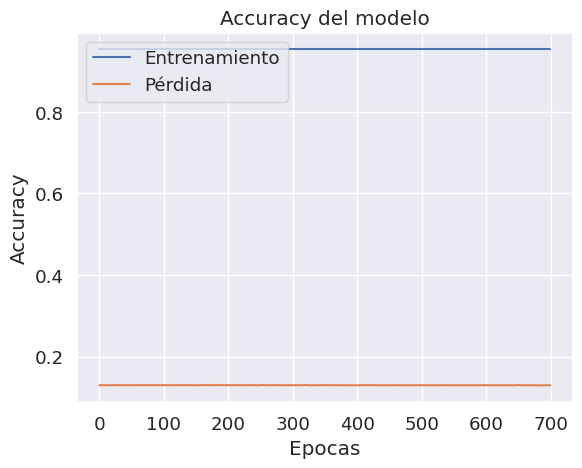

In [83]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print(model.predict(input_of_model).round())
print(target_data_test)
model.summary()
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Accuracy del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento','Pérdida'], loc='upper left')
plt.show()

La primera línea muestra la precisión (accuracy) del modelo en formato porcentaje.

La segunda línea realiza predicciones en los datos de entrenamiento y redondea los valores de salida.

La tercera línea muestra un resumen del modelo, que proporciona detalles sobre su arquitectura y número de parámetros.

Las líneas siguientes utilizan la biblioteca Matplotlib para crear un gráfico que muestra el desempeño del modelo a lo largo de las épocas de entrenamiento. El gráfico incluye la precisión (accuracy) y la pérdida (loss) en el eje Y y el número de épocas en el eje X. También incluye una leyenda que indica qué línea corresponde a la precisión y cuál a la pérdida. El gráfico se muestra al final del informe.


accuracy: 95.52%
15/15 [==============================] - 0s 940us/step
[[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0

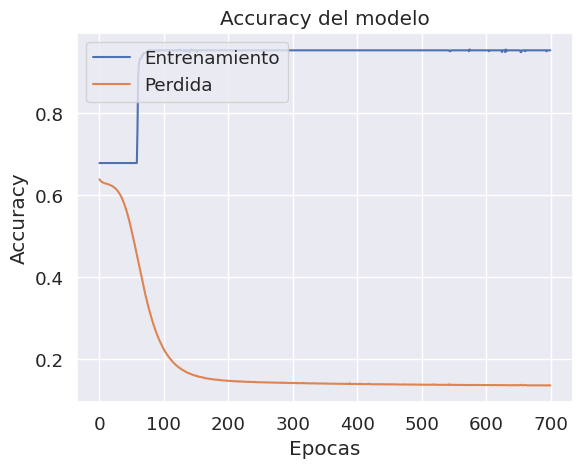

In [73]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print(model.predict(training_data).round())

model.summary()
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Accuracy del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento','Perdida'], loc='upper left')
plt.show()

# Conclusión

En un escenario de predicción utilizando solo dos variables, es posible que el modelo resultante sea ineficiente para capturar las complejidades de la relación entre las variables de entrada y la variable de salida. La falta de información y características puede llevar a un modelo con un rendimiento limitado y una capacidad de generalización deficiente.

No obstante, como parte de una tarea didáctica en el campo del aprendizaje automático, el uso de un conjunto de datos simplificado con pocas variables puede ser valioso para comprender conceptos fundamentales y técnicas de modelado. Esto puede incluir la práctica de preprocesamiento de datos, selección de características, evaluación de modelos y ajuste de hiperparámetros.

Además, recalcar la importancia del "batch size" en el contexto de la retropropagación del aprendizaje en redes neuronales es esencial. El tamaño del lote (batch size) afecta la eficiencia y la convergencia del proceso de entrenamiento de la red neuronal. Un tamaño de lote apropiado puede acelerar el entrenamiento y permitir que el modelo alcance una solución óptima en menos tiempo, mientras que un tamaño de lote inadecuado podría conducir a problemas de memoria o a que el proceso de entrenamiento sea más lento.

Por lo tanto, comprender y ajustar el "batch size" adecuadamente es crucial para optimizar el rendimiento y la eficiencia del proceso de aprendizaje automático en redes neuronales, lo que es una habilidad valiosa en el campo del aprendizaje automático y la inteligencia artificial.